In [44]:
import pandas as pd 
import numpy as np

In [45]:
df = pd.read_csv(r"C:\Users\nktun\OneDrive\Documents\GitHub\Bank_Marketing\bank (original dataset)\bank-full.csv", delimiter=';')

Understanding the data:  
1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   # related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
   
   # other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# No missing attributes, this is for splitting and training immediately

In [46]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [47]:
# Selecting X and y, and then perform train test split
X = df.drop(columns='y')
y = df['y']


In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [49]:
ohe_job = OneHotEncoder(sparse_output=False) # Instantiate a class of OHE
# Job and Marital should be encoded as OHE because of no inherent ranking, but
# Education does have ranking
encoded_job = ohe_job.fit_transform(X[['job']])
# Convert the encoded job back to df format to concat to X
encoded_job_df = pd.DataFrame(encoded_job, columns=ohe_job.get_feature_names_out(['job']))
ohe_marital = OneHotEncoder(sparse_output=False)
encoded_marital = ohe_marital.fit_transform(X[['marital']])
# Convert the encoded job back to df format to concat to X
encoded_marital_df = pd.DataFrame(encoded_marital, columns=ohe_marital.get_feature_names_out(['marital']))

In [50]:
# Concat with the original df
X_encoded = pd.concat([X, encoded_job_df, encoded_marital_df], axis=1)

# Drop the original job column if no longer needed
X_encoded.drop(['job', 'marital'], axis=1, inplace=True)

In [51]:
X_encoded.columns # Ok
X_encoded.head(10)
# Now, we shall map education and replace housing and loan
education_mapping = {'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}
X_encoded['education'] = X_encoded['education'].map(education_mapping)

In [52]:
# Mapping binary features
binary_mapping = {'yes':1, 'no':0}
X_encoded['default'] = X_encoded['default'].map(binary_mapping)
X_encoded['loan'] = X_encoded['loan'].map(binary_mapping)
X_encoded['housing'] = X_encoded['housing'].map(binary_mapping)

In [53]:
X_encoded[['contact', 'month', 'poutcome']]

,contact,month,poutcome
0,unknown,may,unknown
1,unknown,may,unknown
2,unknown,may,unknown
3,unknown,may,unknown
4,unknown,may,unknown
...,...,...,...
45206,cellular,nov,unknown
45207,cellular,nov,unknown
45208,cellular,nov,success
45209,telephone,nov,unknown


In [54]:
# Let's drop the month column for now - I wonder if there is a underlying significance to this column
X_encoded.drop(columns='month', inplace=True)

In [55]:
X_encoded.contact.unique() # cardinality = 3
X_encoded.poutcome.unique() # cardinality = 3, as other can be mapped as unknown
X_encoded['poutcome'] = X_encoded['poutcome'].replace('other', 'unknown')

In [56]:
# Now, OHE can be performed on 2 remaining columns: contact & poutcome
ohe_contact = OneHotEncoder(sparse_output=False) # Instantiate a class of OHE
# Job and Marital should be encoded as OHE because of no inherent ranking, but
# Education does have ranking
encoded_contact = ohe_contact.fit_transform(X[['contact']])
# Convert the encoded job back to df format to concat to X
encoded_contact_df = pd.DataFrame(encoded_contact, columns=ohe_contact.get_feature_names_out(['contact']))
ohe_poutcome = OneHotEncoder(sparse_output=False)
encoded_poutcome = ohe_poutcome.fit_transform(X[['poutcome']])
# Convert the encoded job back to df format to concat to X
encoded_poutcome_df = pd.DataFrame(encoded_poutcome, columns=ohe_poutcome.get_feature_names_out(['poutcome']))

In [59]:
# Concat with the original df
X_encoded = pd.concat([X_encoded, encoded_contact_df, encoded_poutcome_df], axis=1)

# Drop the original job column if no longer needed
X_encoded.drop(['contact', 'poutcome'], axis=1, inplace=True)

In [60]:
# Final review of the df
X_encoded.dtypes

age                    int64
education              int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_admin.           float64
job_blue-collar      float64
job_entrepreneur     float64
job_housemaid        float64
job_management       float64
job_retired          float64
job_self-employed    float64
job_services         float64
job_student          float64
job_technician       float64
job_unemployed       float64
job_unknown          float64
marital_divorced     float64
marital_married      float64
marital_single       float64
contact_cellular     float64
contact_telephone    float64
contact_unknown      float64
poutcome_failure     float64
poutcome_other       float64
poutcome_success     float64
poutcome_unknown     float64
dtype: object

In [63]:
# Outcome has to be binary as well, not categorical
y = y.map(binary_mapping)

In [64]:
    # Splitting the data with 25 - 75
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y , 
                                   random_state=42,  
                                   test_size=0.25,  
                                   shuffle=True) 
# I use XGBoost so no scaling shall be required

### Great, now that the data has been successfully preprocessed & splitted into training set and testing set

In [67]:
# Get rolling with XGBoost
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [68]:
# Conversion to DMatrix to ensure operational efficiency from xgb's side
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [70]:
# For a classification problem, use XGBClassifier
from xgboost import XGBClassifier

In [71]:
# Instantiate the XGBoost classifier, as with any other ML models
xgb_model = XGBClassifier() # Will do with the default for now

In [72]:
# Fit the model based on training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
# Make predictions based on the training data
y_pred = xgb_model.predict(X_test) 

In [74]:
# Evaluation of model: Compare y_pred and y_test
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9008
Confusion Matrix:
[[9593  357]
 [ 764  589]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9950
           1       0.62      0.44      0.51      1353

    accuracy                           0.90     11303
   macro avg       0.77      0.70      0.73     11303
weighted avg       0.89      0.90      0.89     11303



In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))

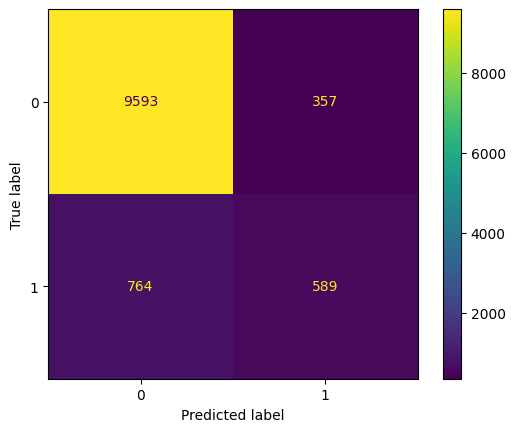

In [81]:
matrix.plot()

In [90]:
y.sum() # 5289 yes over 45k --> There is class imbalance here

5289